In [ ]:
!pip install kaggle


In [ ]:
!gdown 1rIY1IgtiZ4Lx-S4cuA1HYAwMmiWnhz1F

Downloading...
From: https://drive.google.com/uc?id=1rIY1IgtiZ4Lx-S4cuA1HYAwMmiWnhz1F
To: /content/kaggle.json
100% 72.0/72.0 [00:00<00:00, 165kB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ranzeet013/cervical-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/ranzeet013/cervical-cancer-dataset
License(s): apache-2.0
  0% 0.00/8.55k [00:00<?, ?B/s]
100% 8.55k/8.55k [00:00<00:00, 12.5MB/s]


In [ ]:
!unzip cervical-cancer-dataset.zip -d cervical-cancer-dataset


Archive:  cervical-cancer-dataset.zip
  inflating: cervical-cancer-dataset/cervical-cancer_csv.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/cervical-cancer-dataset/cervical-cancer_csv.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.tail()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
834,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(835, 36)

In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()


,0
Age,0
Number of sexual partners,25
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,103
Hormonal Contraceptives (years),103
IUD,112


In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np


imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed.isnull().sum())



Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
df_imputed.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [ ]:
df_imputed.shape

(835, 34)

In [ ]:
df_imputed.to_csv('df_imputed.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score

# High-potential outlier columns
outlier_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
                   'STDs (number)']


from sklearn.ensemble import IsolationForest

# Outlier Detection
isolation_forest = IsolationForest( random_state=42)
outliers = isolation_forest.fit_predict(df_imputed[outlier_columns])
df_imputed['outlier'] = outliers
df_no_outliers = df_imputed[df_imputed['outlier'] == 1].drop(columns=['outlier'])  # Filter outliers
df_no_outliers.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,20.056839,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_no_outliers.shape

(778, 34)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target variable
X_no_outliers = df_no_outliers.drop(columns=['Biopsy'])
y_no_outliers = df_no_outliers['Biopsy']

# Split the data
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, stratify=y_no_outliers, random_state=42
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled_no_outliers, y_resampled_no_outliers = smote.fit_resample(X_train_no_outliers, y_train_no_outliers)


In [ ]:
print("Original class distribution in y_train_no_outliers:")
print(y_train_no_outliers.value_counts())

print("Class distribution after SMOTE in y_resampled_no_outliers:")
print(y_resampled_no_outliers.value_counts())


Original class distribution in y_train_no_outliers:
Biopsy
0.0    584
1.0     38
Name: count, dtype: int64
Class distribution after SMOTE in y_resampled_no_outliers:
Biopsy
0.0    584
1.0    584
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Define the rounding function
def custom_round(x):
    return np.floor(x) if x - np.floor(x) < 0.5 else np.ceil(x)

# Apply the rounding function to each element in X_resampled_no_outliers
X_resampled_no_outliers = pd.DataFrame(X_resampled_no_outliers, columns=X_no_outliers.columns).applymap(custom_round)

# Convert y_resampled_no_outliers to a DataFrame and apply rounding if necessary (though usually 'Biopsy' is binary, double-check if it needs rounding)
y_resampled_no_outliers = pd.DataFrame(y_resampled_no_outliers, columns=['Biopsy']).applymap(custom_round)

# Concatenate features and target for the complete dataset
df_resampled = pd.concat([X_resampled_no_outliers, y_resampled_no_outliers], axis=1)

# Display the first few rows
print(df_resampled.head())

# Export the rounded data to a CSV file
df_resampled.to_csv('rounded_resampled_data.csv', index=False)
print("Rounded resampled data saved to 'rounded_resampled_data.csv'")


    Age  Number of sexual partners  First sexual intercourse  \
0  18.0                        1.0                      15.0   
1  25.0                        5.0                      16.0   
2  46.0                        3.0                      21.0   
3  19.0                        4.0                      15.0   
4  22.0                        1.0                      17.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 2.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 4.0     0.0             0.0                  0.0   
3                 1.0     0.0             0.0                  0.0   
4                 2.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      1.0                              0.0  0.0  ...   
1                      0.0                      

In [ ]:
df_resampled

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,1.0,15.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,5.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.0,4.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.0,1.0,17.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,21.0,2.0,17.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1164,26.0,3.0,15.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1165,20.0,3.0,17.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1166,22.0,3.0,15.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
X_resampled_no_outliers

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,1.0,15.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,5.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.0,4.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.0,1.0,17.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,21.0,2.0,17.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1164,26.0,3.0,15.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1165,20.0,3.0,17.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1166,22.0,3.0,15.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
y_resampled_no_outliers

,Biopsy
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1163,1.0
1164,1.0
1165,1.0
1166,1.0


In [ ]:
df_resampled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1168 non-null   float64
 1   Number of sexual partners           1168 non-null   float64
 2   First sexual intercourse            1168 non-null   float64
 3   Num of pregnancies                  1168 non-null   float64
 4   Smokes                              1168 non-null   float64
 5   Smokes (years)                      1168 non-null   float64
 6   Smokes (packs/year)                 1168 non-null   float64
 7   Hormonal Contraceptives             1168 non-null   float64
 8   Hormonal Contraceptives (years)     1168 non-null   float64
 9   IUD                                 1168 non-null   float64
 10  IUD (years)                         1168 non-null   float64
 11  STDs                                1168 no

# Processed Data Performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
# X = df.drop(columns=['Dx:Cancer'])
# y = df['Dx:Cancer']
X_resampled, X_test, y_resampled, y_test = train_test_split(X_resampled_no_outliers, y_resampled_no_outliers,
test_size=0.2, stratify = y_resampled_no_outliers, random_state=42)
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)
RandomForestClassifier(random_state=42)
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       117
         1.0       0.97      0.97      0.97       117

    accuracy                           0.97       234
   macro avg       0.97      0.97      0.97       234
weighted avg       0.97      0.97      0.97       234

Confusion Matrix:
[[114   3]
 [  3 114]]


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)
DecisionTreeClassifier(random_state=42)
y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       117
         1.0       0.94      0.97      0.96       117

    accuracy                           0.96       234
   macro avg       0.96      0.96      0.96       234
weighted avg       0.96      0.96      0.96       234

Confusion Matrix:
[[110   7]
 [  3 114]]


In [ ]:
log_reg_classifier = LogisticRegression(random_state=42)
log_reg_classifier.fit(X_resampled, y_resampled)
LogisticRegression(random_state=42)
y_pred_log_reg = log_reg_classifier.predict(X_test)
print("Logistic Regression")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       117
         1.0       0.95      0.94      0.94       117

    accuracy                           0.94       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.94      0.94      0.94       234

Confusion Matrix:
[[111   6]
 [  7 110]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the classifier with the correct parameters
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model on the resampled data
xgb_classifier.fit(X_resampled, y_resampled)

# Predict the labels for the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Print the results
print("XGBoost Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       117
         1.0       0.98      0.97      0.98       117

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234

Confusion Matrix:
[[115   2]
 [  3 114]]


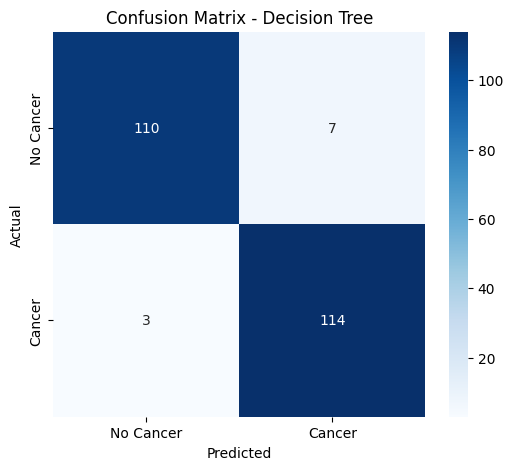

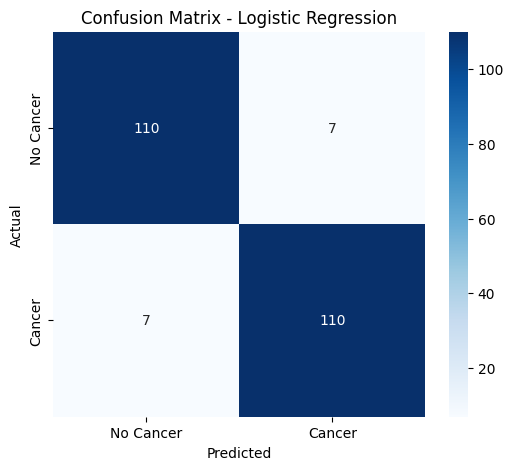

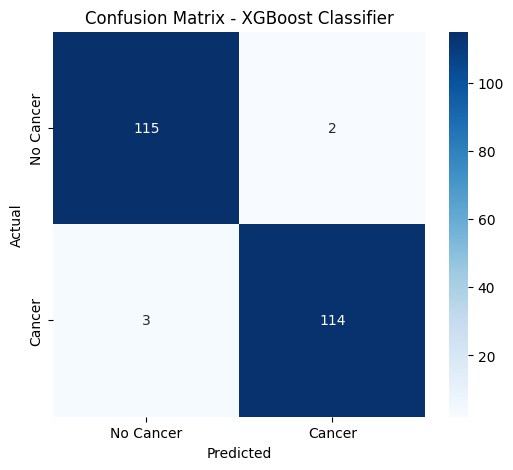

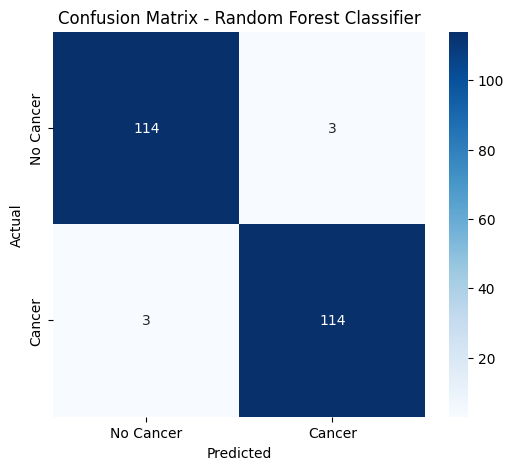

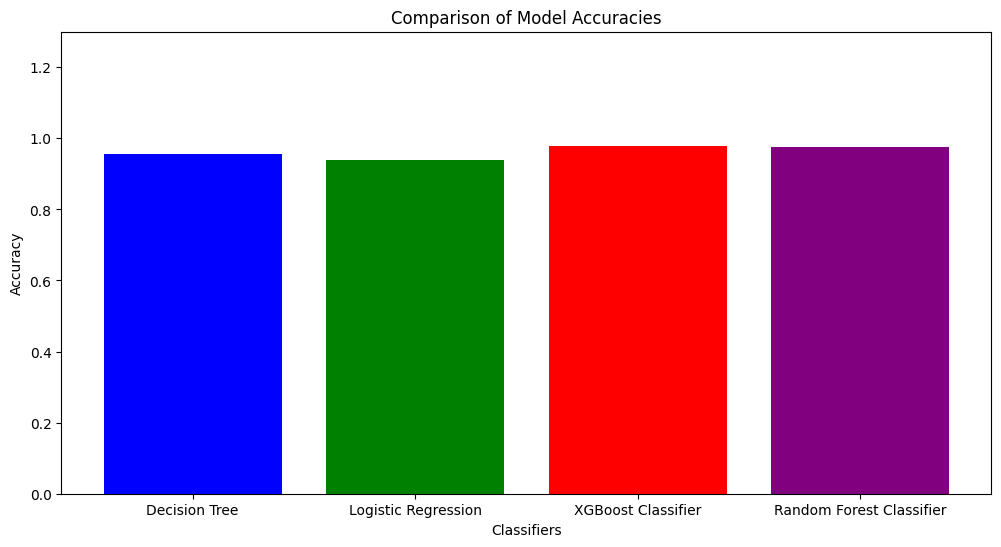

In [ ]:
classifiers = {
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(random_state=42,
max_iter=1000),
 'XGBoost Classifier': XGBClassifier(random_state=42,
use_label_encoder=False, eval_metric='logloss'), 'Random Forest Classifier':
RandomForestClassifier(random_state=42)
}
from sklearn.metrics import accuracy_score
results = {}
for name, clf in classifiers.items():
 clf.fit(X_resampled, y_resampled)
 y_pred = clf.predict(X_test)
 accuracy = accuracy_score(y_test, y_pred)
 results[name] = accuracy
 cm = confusion_matrix(y_test, y_pred)

 plt.figure(figsize=(6, 5))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.title(f'Confusion Matrix - {name}')
 plt.show()
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green',
'red', 'purple', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1.3)
plt.show()

# Unprocessed data performance


Random Forest Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       156
         1.0       0.86      0.55      0.67        11

    accuracy                           0.96       167
   macro avg       0.91      0.77      0.82       167
weighted avg       0.96      0.96      0.96       167



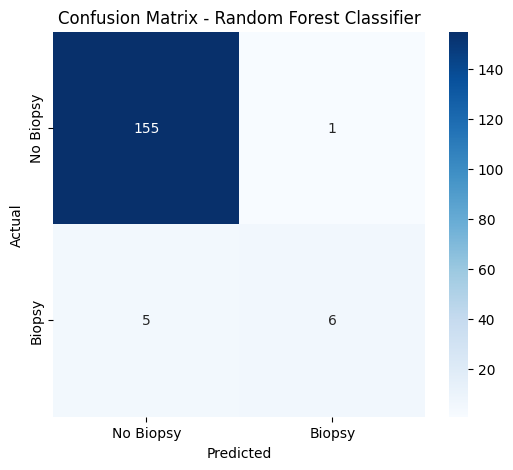


Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       156
         1.0       0.80      0.73      0.76        11

    accuracy                           0.97       167
   macro avg       0.89      0.86      0.87       167
weighted avg       0.97      0.97      0.97       167



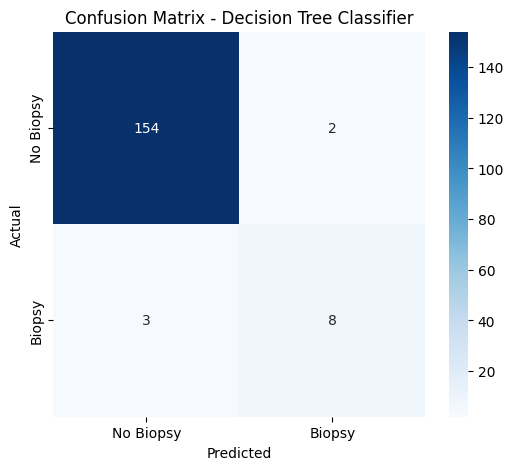


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       156
         1.0       0.78      0.64      0.70        11

    accuracy                           0.96       167
   macro avg       0.88      0.81      0.84       167
weighted avg       0.96      0.96      0.96       167



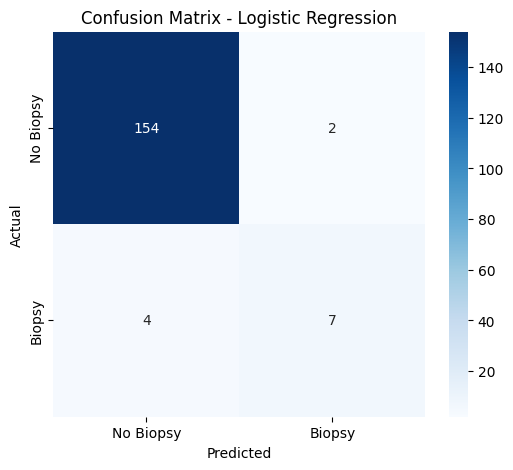


XGBoost Classifier
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       156
         1.0       0.73      0.73      0.73        11

    accuracy                           0.96       167
   macro avg       0.85      0.85      0.85       167
weighted avg       0.96      0.96      0.96       167



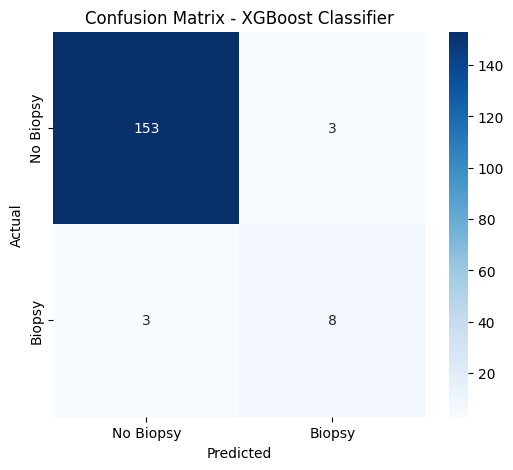

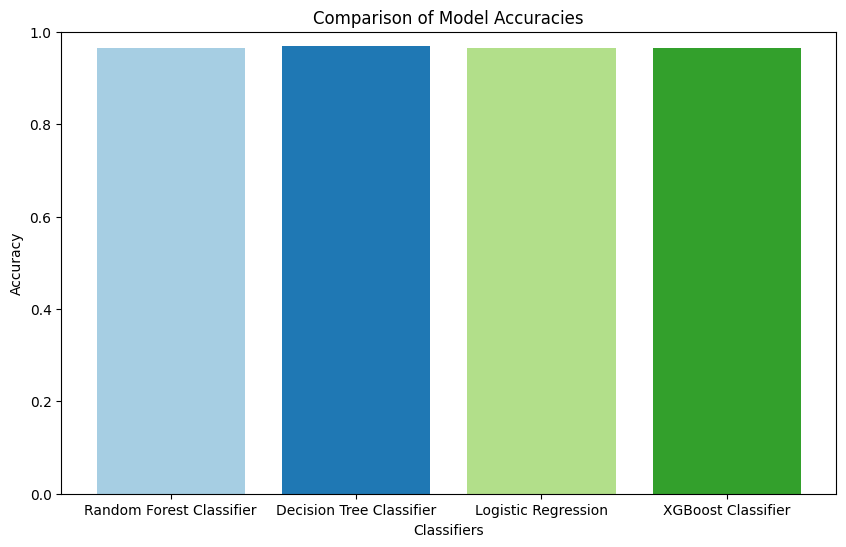

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/cervical-cancer-dataset/cervical-cancer_csv.csv')

# Impute missing values in the dataset
# Using mean for numerical columns and median for binary/ordinal columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
binary_cols = [col for col in df.columns if len(df[col].value_counts()) == 2]

# Mean imputation for numerical columns
mean_imputer = SimpleImputer(strategy='mean')
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

# Median imputation for binary columns
median_imputer = SimpleImputer(strategy='median')
df[binary_cols] = median_imputer.fit_transform(df[binary_cols])

# Define features (X) and target variable (y)
X = df.drop(columns=['Biopsy'])
y = df['Biopsy']

# Split the data into training and testing sets
X_unprocessed_train, X_unprocessed_test, y_unprocessed_train, y_unprocessed_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize the classifiers
classifiers = {
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost Classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store accuracy results
results = {}

# Fit each classifier, make predictions, and display results
for name, classifier in classifiers.items():
    # Train the classifier on the training data
    classifier.fit(X_unprocessed_train, y_unprocessed_train)

    # Predict on the test data
    y_pred = classifier.predict(X_unprocessed_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_unprocessed_test, y_pred)
    results[name] = accuracy

    # Display classification report
    print(f"\n{name}")
    print("Classification Report:")
    print(classification_report(y_unprocessed_test, y_pred))

    # Display confusion matrix as a heatmap
    cm = confusion_matrix(y_unprocessed_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Biopsy', 'Biopsy'], yticklabels=['No Biopsy', 'Biopsy'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Display bar chart for model accuracies
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(results)))
plt.bar(results.keys(), results.values(), color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Setting the y-axis limit to 1 for a percentage scale
plt.show()
